# Infraestrutura e Dependências 

## * Verificando se o tensorflow encontra a GPU local

In [1]:
import tensorflow as tf

# List available GPUs

gpus = tf.config.list_physical_devices('GPU')
print("Available GPUs:", gpus)

# Allocate GPU memory dynamically
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


2023-09-20 00:03:50.790514: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-09-20 00:03:52.164839: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-20 00:03:52.168357: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-20 00:03:52.168508: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

## * Verificando as propriedades da GPU local

In [2]:
!nvidia-smi


Wed Sep 20 00:03:52 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650         On | 00000000:01:00.0 Off |                  N/A |
| N/A   50C    P0               13W /  50W|    432MiB /  4096MiB |     24%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## * Verificando se as bilbiotecas foram instaladas corretamente, junto do tensorflow

In [3]:
!pip list

Package                      Version
---------------------------- --------------------
absl-py                      1.4.0
anyio                        3.6.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
attrs                        22.2.0
backcall                     0.2.0
beautifulsoup4               4.12.0
bleach                       6.0.0
cachetools                   5.3.0
certifi                      2019.11.28
cffi                         1.15.1
chardet                      3.0.4
comm                         0.1.3
contourpy                    1.0.7
cycler                       0.11.0
dbus-python                  1.2.16
debugpy                      1.6.6
decorator                    5.1.1
defusedxml                   0.7.1
executing                    1.2.0
fastjsonschema               2.16.3
flatbuffers                  23.3.3
fonttools               

# Análise e processamento dos dados T1

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import math

In [5]:
CURRENT = os.getcwd()
ROOT = os.path.join("/project")
DATASETS = os.path.join(ROOT, "datasets")
DATASETS_EXTRACTED = os.path.join(DATASETS, "extracted")
STIR_PATH = os.path.join(DATASETS_EXTRACTED, "STIR.csv")

In [6]:
STIR = pd.read_csv(STIR_PATH) \
      .sort_values(by="case_PatientID", ignore_index=True)

In [7]:
STIR.head()

,case_PatientID,STIR_original_shape_Elongation,STIR_original_shape_Flatness,STIR_original_shape_LeastAxisLength,STIR_original_shape_MajorAxisLength,STIR_original_shape_Maximum2DDiameterColumn,STIR_original_shape_Maximum2DDiameterRow,STIR_original_shape_Maximum2DDiameterSlice,STIR_original_shape_Maximum3DDiameter,STIR_original_shape_MeshVolume,...,STIR_wavelet-LLL_gldm_LowGrayLevelEmphasis,STIR_wavelet-LLL_gldm_SmallDependenceEmphasis,STIR_wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,STIR_wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,STIR_wavelet-LLL_ngtdm_Busyness,STIR_wavelet-LLL_ngtdm_Coarseness,STIR_wavelet-LLL_ngtdm_Complexity,STIR_wavelet-LLL_ngtdm_Contrast,STIR_wavelet-LLL_ngtdm_Strength,STIR_LungMets
0,STS_002,0.902961,0.661239,33.122709,50.091877,58.249464,54.083269,57.314920,58.864251,51197.625,...,0.001565,0.713815,7702.367375,0.000616,0.006910,0.009653,213222.857334,0.815927,261.107140,0
1,STS_003,0.703092,0.685046,42.547349,62.108703,65.520989,72.622311,54.083269,76.249590,80653.500,...,0.001085,0.665096,5362.708021,0.000985,0.014839,0.004550,77016.824576,0.534899,35.008041,0
2,STS_004,0.545471,0.447141,53.787869,120.292849,158.858428,141.509717,77.129761,159.113167,296077.500,...,0.001067,0.621071,4436.085618,0.000608,0.061644,0.001189,282803.977945,0.784436,57.831025,0
3,STS_008,0.668074,0.545088,26.619769,48.835760,72.498276,54.332311,40.804412,73.484692,26356.500,...,0.001633,0.792188,6755.282308,0.001583,0.009486,0.009365,178758.097771,1.686408,106.656512,0
4,STS_010,0.755666,0.542801,47.028703,86.640737,96.932967,93.145048,80.498447,100.264650,186697.125,...,0.000235,0.507669,7287.351367,0.000200,0.017900,0.002471,59588.815045,0.218829,28.211109,0


In [8]:
STIR.tail()

,case_PatientID,STIR_original_shape_Elongation,STIR_original_shape_Flatness,STIR_original_shape_LeastAxisLength,STIR_original_shape_MajorAxisLength,STIR_original_shape_Maximum2DDiameterColumn,STIR_original_shape_Maximum2DDiameterRow,STIR_original_shape_Maximum2DDiameterSlice,STIR_original_shape_Maximum3DDiameter,STIR_original_shape_MeshVolume,...,STIR_wavelet-LLL_gldm_LowGrayLevelEmphasis,STIR_wavelet-LLL_gldm_SmallDependenceEmphasis,STIR_wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,STIR_wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,STIR_wavelet-LLL_ngtdm_Busyness,STIR_wavelet-LLL_ngtdm_Coarseness,STIR_wavelet-LLL_ngtdm_Complexity,STIR_wavelet-LLL_ngtdm_Contrast,STIR_wavelet-LLL_ngtdm_Strength,STIR_LungMets
20,STS_037,0.757220,0.451586,66.487604,147.231395,157.035028,147.732867,140.616500,166.195668,739681.875,...,0.000481,0.537504,6328.741577,0.000272,0.055354,0.001198,105070.650369,0.423202,22.227557,1
21,STS_039,0.496934,0.342933,63.490303,185.139246,196.562967,192.981864,106.066017,199.674736,740205.000,...,0.000264,0.535901,3647.767531,0.000167,0.128417,0.000523,75532.869353,0.231489,5.516570,1
22,STS_040,0.818721,0.683705,68.928138,100.815557,117.881296,119.549153,95.341491,125.139922,398950.875,...,0.001127,0.515217,1069.579089,0.000621,0.279332,0.000857,17261.197047,0.223588,2.588801,1
23,STS_042,0.700445,0.372455,22.044467,59.186997,61.846584,74.518454,51.264022,74.578817,35024.625,...,0.000880,0.803895,16450.227918,0.000867,0.005340,0.006683,283383.076869,1.804575,99.963530,0
24,STS_050,0.811919,0.609051,47.759602,78.416371,88.639720,86.377080,73.239334,90.448881,166674.375,...,0.000457,0.608473,3893.434032,0.000359,0.056977,0.002383,44438.458452,0.737100,13.914988,1


* Seguiremos sem seleção de variáveis 
* Vamos aplicar normalização sobre estes dados

In [9]:
X = STIR.drop(labels=["case_PatientID","STIR_LungMets"], axis=1)
y = STIR["STIR_LungMets"]

In [10]:
X.head()

,STIR_original_shape_Elongation,STIR_original_shape_Flatness,STIR_original_shape_LeastAxisLength,STIR_original_shape_MajorAxisLength,STIR_original_shape_Maximum2DDiameterColumn,STIR_original_shape_Maximum2DDiameterRow,STIR_original_shape_Maximum2DDiameterSlice,STIR_original_shape_Maximum3DDiameter,STIR_original_shape_MeshVolume,STIR_original_shape_MinorAxisLength,...,STIR_wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,STIR_wavelet-LLL_gldm_LowGrayLevelEmphasis,STIR_wavelet-LLL_gldm_SmallDependenceEmphasis,STIR_wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,STIR_wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,STIR_wavelet-LLL_ngtdm_Busyness,STIR_wavelet-LLL_ngtdm_Coarseness,STIR_wavelet-LLL_ngtdm_Complexity,STIR_wavelet-LLL_ngtdm_Contrast,STIR_wavelet-LLL_ngtdm_Strength
0,0.902961,0.661239,33.122709,50.091877,58.249464,54.083269,57.314920,58.864251,51197.625,45.231032,...,0.005826,0.001565,0.713815,7702.367375,0.000616,0.006910,0.009653,213222.857334,0.815927,261.107140
1,0.703092,0.685046,42.547349,62.108703,65.520989,72.622311,54.083269,76.249590,80653.500,43.668155,...,0.001594,0.001085,0.665096,5362.708021,0.000985,0.014839,0.004550,77016.824576,0.534899,35.008041
2,0.545471,0.447141,53.787869,120.292849,158.858428,141.509717,77.129761,159.113167,296077.500,65.616245,...,0.005801,0.001067,0.621071,4436.085618,0.000608,0.061644,0.001189,282803.977945,0.784436,57.831025
3,0.668074,0.545088,26.619769,48.835760,72.498276,54.332311,40.804412,73.484692,26356.500,32.625902,...,0.001880,0.001633,0.792188,6755.282308,0.001583,0.009486,0.009365,178758.097771,1.686408,106.656512
4,0.755666,0.542801,47.028703,86.640737,96.932967,93.145048,80.498447,100.264650,186697.125,65.471448,...,0.000539,0.000235,0.507669,7287.351367,0.000200,0.017900,0.002471,59588.815045,0.218829,28.211109


In [11]:
from sklearn.preprocessing import StandardScaler

# For neural networks, standardization (Z-score normalization) is often a good choice. 
# It helps the network converge faster and avoids large weight updates that can slow down training. 

# normalized_data = (data - mean) / std_dev

scaler = StandardScaler()
normalized_data = scaler.fit_transform(X)

In [12]:
NORMALIZATION_PROPERTIES = pd.DataFrame(data=np.array([scaler.scale_, scaler.mean_, scaler.var_]), 
                                        index=["Scale", "Mean", "Variance"], columns=[X.columns] )
NORMALIZATION_PROPERTIES

,STIR_original_shape_Elongation,STIR_original_shape_Flatness,STIR_original_shape_LeastAxisLength,STIR_original_shape_MajorAxisLength,STIR_original_shape_Maximum2DDiameterColumn,STIR_original_shape_Maximum2DDiameterRow,STIR_original_shape_Maximum2DDiameterSlice,STIR_original_shape_Maximum3DDiameter,STIR_original_shape_MeshVolume,STIR_original_shape_MinorAxisLength,...,STIR_wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,STIR_wavelet-LLL_gldm_LowGrayLevelEmphasis,STIR_wavelet-LLL_gldm_SmallDependenceEmphasis,STIR_wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,STIR_wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,STIR_wavelet-LLL_ngtdm_Busyness,STIR_wavelet-LLL_ngtdm_Coarseness,STIR_wavelet-LLL_ngtdm_Complexity,STIR_wavelet-LLL_ngtdm_Contrast,STIR_wavelet-LLL_ngtdm_Strength
Scale,0.132017,0.109777,20.894593,59.568882,55.106874,66.517591,56.436333,66.949052,5.414379e+05,31.806010,...,0.001566,4.659983e-04,0.132530,1.223324e+04,4.137566e-04,0.083492,0.003011,4.152119e+05,1.108400,140.732732
Mean,0.684878,0.498120,55.646481,118.853608,122.126952,134.313551,103.263839,142.061341,5.008959e+05,77.652209,...,0.001896,6.338364e-04,0.617190,9.554793e+03,4.770514e-04,0.065864,0.002942,2.427787e+05,0.821853,75.713080
Variance,0.017428,0.012051,436.584018,3548.451734,3036.767599,4424.589952,3185.059647,4482.175504,2.931550e+11,1011.622254,...,0.000002,2.171545e-07,0.017564,1.496522e+08,1.711946e-07,0.006971,0.000009,1.724009e+11,1.228551,19805.701864


In [13]:
X_scaled = pd.DataFrame(normalized_data, columns=[X.columns])

In [14]:
X_scaled.head()

,STIR_original_shape_Elongation,STIR_original_shape_Flatness,STIR_original_shape_LeastAxisLength,STIR_original_shape_MajorAxisLength,STIR_original_shape_Maximum2DDiameterColumn,STIR_original_shape_Maximum2DDiameterRow,STIR_original_shape_Maximum2DDiameterSlice,STIR_original_shape_Maximum3DDiameter,STIR_original_shape_MeshVolume,STIR_original_shape_MinorAxisLength,...,STIR_wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,STIR_wavelet-LLL_gldm_LowGrayLevelEmphasis,STIR_wavelet-LLL_gldm_SmallDependenceEmphasis,STIR_wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,STIR_wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,STIR_wavelet-LLL_ngtdm_Busyness,STIR_wavelet-LLL_ngtdm_Coarseness,STIR_wavelet-LLL_ngtdm_Complexity,STIR_wavelet-LLL_ngtdm_Contrast,STIR_wavelet-LLL_ngtdm_Strength
0,1.651941,1.485907,-1.077971,-1.154323,-1.159156,-1.206151,-0.814173,-1.242693,-0.830563,-1.019341,...,2.510244,1.997765,0.729073,-0.151426,0.335335,-0.706109,2.228458,-0.071183,-0.005346,1.317349
1,0.137972,1.702777,-0.626915,-0.952593,-1.027203,-0.927442,-0.871435,-0.983012,-0.776160,-1.068479,...,-0.192529,0.968335,0.361468,-0.342680,1.226888,-0.611138,0.533999,-0.399222,-0.258890,-0.289236
2,-1.055980,-0.464389,-0.088952,0.024161,0.666550,0.108184,-0.463072,0.254699,-0.378286,-0.378418,...,2.494258,0.928757,0.029280,-0.418426,0.315427,-0.050551,-0.582124,0.096397,-0.033757,-0.127064
3,-0.127285,0.427841,-1.389197,-1.175410,-0.900590,-1.202407,-1.106724,-1.024311,-0.876443,-1.415654,...,-0.009760,2.143681,1.320438,-0.228845,2.672260,-0.675260,2.132645,-0.154188,0.780003,0.219874
4,0.536206,0.407014,-0.412441,-0.540767,-0.457184,-0.618912,-0.403382,-0.624306,-0.580304,-0.382970,...,-0.866241,-0.856105,-0.826389,-0.185351,-0.668531,-0.574483,-0.156374,-0.441196,-0.544049,-0.337533


In [15]:
y = pd.DataFrame(data=y,columns=["STIR_LungMets"])

In [16]:
y.head(n=6)

,STIR_LungMets
0,0
1,0
2,0
3,0
4,0
5,0


In [17]:
y.value_counts() 

STIR_LungMets
0                16
1                 9
dtype: int64

In [18]:
a, b = y.value_counts().values / y.count().values[0] * 100
print("% que não desenvolveu metástase:", a, 
      "\n% que desenvolveu metástase:", b
)

% que não desenvolveu metástase: 64.0 
% que desenvolveu metástase: 36.0


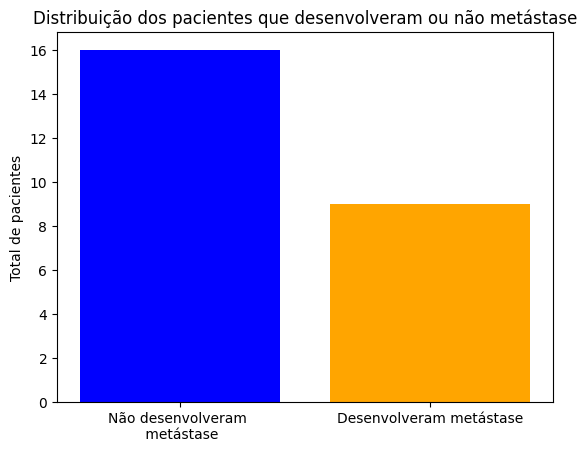

In [19]:
import matplotlib.pyplot as plt

plt.bar([0,1], y.value_counts().values, color=['blue', 'orange'])

# Adding labels and title
# plt.xlabel('Target Value')
plt.ylabel('Total de pacientes')
plt.title('Distribuição dos pacientes que desenvolveram ou não metástase')

# Adding tick labels
plt.xticks(ticks=[0,1], labels=['Não desenvolveram \n metástase', 
                                'Desenvolveram metástase'])
, 
# Display the plot
plt.show()

* Sabemos que as classes estão suficientemente balanceadas (60 - 40)

In [20]:
X_scaled.head()

,STIR_original_shape_Elongation,STIR_original_shape_Flatness,STIR_original_shape_LeastAxisLength,STIR_original_shape_MajorAxisLength,STIR_original_shape_Maximum2DDiameterColumn,STIR_original_shape_Maximum2DDiameterRow,STIR_original_shape_Maximum2DDiameterSlice,STIR_original_shape_Maximum3DDiameter,STIR_original_shape_MeshVolume,STIR_original_shape_MinorAxisLength,...,STIR_wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,STIR_wavelet-LLL_gldm_LowGrayLevelEmphasis,STIR_wavelet-LLL_gldm_SmallDependenceEmphasis,STIR_wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,STIR_wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,STIR_wavelet-LLL_ngtdm_Busyness,STIR_wavelet-LLL_ngtdm_Coarseness,STIR_wavelet-LLL_ngtdm_Complexity,STIR_wavelet-LLL_ngtdm_Contrast,STIR_wavelet-LLL_ngtdm_Strength
0,1.651941,1.485907,-1.077971,-1.154323,-1.159156,-1.206151,-0.814173,-1.242693,-0.830563,-1.019341,...,2.510244,1.997765,0.729073,-0.151426,0.335335,-0.706109,2.228458,-0.071183,-0.005346,1.317349
1,0.137972,1.702777,-0.626915,-0.952593,-1.027203,-0.927442,-0.871435,-0.983012,-0.776160,-1.068479,...,-0.192529,0.968335,0.361468,-0.342680,1.226888,-0.611138,0.533999,-0.399222,-0.258890,-0.289236
2,-1.055980,-0.464389,-0.088952,0.024161,0.666550,0.108184,-0.463072,0.254699,-0.378286,-0.378418,...,2.494258,0.928757,0.029280,-0.418426,0.315427,-0.050551,-0.582124,0.096397,-0.033757,-0.127064
3,-0.127285,0.427841,-1.389197,-1.175410,-0.900590,-1.202407,-1.106724,-1.024311,-0.876443,-1.415654,...,-0.009760,2.143681,1.320438,-0.228845,2.672260,-0.675260,2.132645,-0.154188,0.780003,0.219874
4,0.536206,0.407014,-0.412441,-0.540767,-0.457184,-0.618912,-0.403382,-0.624306,-0.580304,-0.382970,...,-0.866241,-0.856105,-0.826389,-0.185351,-0.668531,-0.574483,-0.156374,-0.441196,-0.544049,-0.337533


In [21]:
y.head()

,STIR_LungMets
0,0
1,0
2,0
3,0
4,0


## Feature Selection and preparing final data for training and prediction

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

N_FEATURES = 150

X = SelectKBest(f_classif, k=N_FEATURES).fit_transform(X_scaled, y)
X.shape

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


(25, 150)

## Searching for best hyperparameters for the Multi-Layer Perceptron (MLP) Neural Network

In [23]:
from matplotlib import rcParams
from sklearn.model_selection import LeaveOneOut, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import (
                            accuracy_score, 
                            precision_score, 
                            recall_score,
                            f1_score, 
                            roc_curve, 
                            auc, 
                            confusion_matrix, 
                            ConfusionMatrixDisplay
                            )


In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score

RANDOM_SEED=28

# Define a function to create your Keras model
def create_model(input_dim, hidden_units=128, dropout_rate=0.5, learning_rate=0.001):
    
    model = Sequential([
        Dense(hidden_units, activation='relu', input_dim=input_dim),
        Dropout(dropout_rate),
        Dense(hidden_units // 2, activation='relu'),
        Dropout(dropout_rate),
        Dense(hidden_units // 2, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=[
                      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                      tf.keras.metrics.Recall(name='recall'),
                      tf.keras.metrics.Precision(name='precision')
                  ]
                 )
    
    return model

# Create a KerasClassifier for scikit-learn compatibility
model = KerasClassifier(build_fn=create_model, input_dim=N_FEATURES, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'hidden_units': [64, 128, 256, 512],
    'dropout_rate': [0.4, 0.5, 0.6],
    'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],
    'batch_size': [1, 2, 4, 8, 16], # 32
    'epochs': [100] # 50
}

# Define a custom scoring function that combines accuracy, precision, and recall
def custom_scorer(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    
    # You can assign weights to each metric as needed
    combined_score = 0.6 * accuracy + 0.15 * precision + 0.25 * recall
    
    return combined_score

# Create a scorer based on the custom scoring function
scoring = make_scorer(custom_scorer)

# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(model, param_distributions=param_grid, scoring=scoring,
                                   n_iter=100, cv=3, verbose=2, random_state=RANDOM_SEED, refit=True)

# Fit the RandomizedSearchCV to your data
random_search.fit(X,y) # X_train, y_train

In [ ]:
# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

## Instantiating the architecture of the Multi-Layer Perceptron (MLP) Neural Network 

In [24]:
def mlp_model():
    
    # Defining the Sequential model
    model = Sequential([
        Dense(1024, activation='relu', input_dim=N_FEATURES),
        Dropout(0.6),
        
        Dense(1024 // 2, activation='relu'),
        Dropout(0.6),
        
        Dense(1024 // 4, activation='relu'),
        Dropout(0.6),
        
        Dense(1, activation='sigmoid')
    ])

    # Compiling the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  loss='binary_crossentropy',
                  metrics=[
                      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                      tf.keras.metrics.Recall(name='recall'),
                      tf.keras.metrics.Precision(name='precision')
                  ]
                 )
    
    return model

# Train the model with early stopping to prevent overfitting 
# (does not work to LOOCV, only when we specify validation data)
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     patience=10,  # You can adjust the patience as needed
#     restore_best_weights=True
# )

## Test: LOOCV

In [25]:
# Define the number of epochs
N_EPOCHS=150 #150
THRESHOLD_VAL=0.5
BATCH_SIZE=4 # 4

# Initialize lists to store predicted probabilities and binary predictions
probs_preds_list = []
binary_preds_list = []

# Initialize lists to store training history metrics for plotting
loss_list = []
accuracy_list = []
y_list = []

# Define the feature and label datasets
X = pd.DataFrame(X)
y = y

# 'val_accuracy', 'val_loss'

In [26]:
# Perform LOOCV
loo = LeaveOneOut()
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Instantiate the model
    model = mlp_model()
    
    # Fit the model on the training data
    history = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=N_EPOCHS, 
                        verbose=1) # callbacks=[early_stopping], use_multiprocessing=True

     # Evaluate the model on the test data and store predictions
    y_probs = model.predict(X_test)
    y_pred_binary = (y_probs >= THRESHOLD_VAL).astype(int)
    
    # Store predicted probabilities and binary predictions for this fold
    # along with it's true label
    probs_preds_list.append(y_probs[0][0])
    binary_preds_list.append(y_pred_binary[0][0])
    y_list.append(y_test.values[0][0])

    # Store the training history metrics for this fold
    loss_list.append(history.history['loss'])
    accuracy_list.append(history.history['accuracy'])



Epoch 1/150


2023-09-20 00:04:05.560415: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-20 00:04:05.560731: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-20 00:04:05.561057: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

6/6 [==============================] - 2s 4ms/step - loss: 2.6190 - accuracy: 0.5833 - recall: 0.2222 - precision: 0.4000     
Epoch 2/150
6/6 [==============================] - 0s 4ms/step - loss: 10.9123 - accuracy: 0.6667 - recall: 0.4444 - precision: 0.5714
Epoch 3/150
6/6 [==============================] - 0s 3ms/step - loss: 18.2396 - accuracy: 0.6667 - recall: 0.7778 - precision: 0.5385
Epoch 4/150
6/6 [==============================] - 0s 3ms/step - loss: 33.7751 - accuracy: 0.5833 - recall: 0.3333 - precision: 0.4286
Epoch 5/150
6/6 [==============================] - 0s 3ms/step - loss: 13.5859 - accuracy: 0.5417 - recall: 0.3333 - precision: 0.3750   
Epoch 6/150
6/6 [==============================] - 0s 3ms/step - loss: 6.7275 - accuracy: 0.6250 - recall: 0.6667 - precision: 0.5000
Epoch 7/150
6/6 [==============================] - 0s 3ms/step - loss: 4.8920 - accuracy: 0.6250 - recall: 0.4444 - precision: 0.5000    
Epoch 8/150
6/6 [==============================] - 0s 3ms/

6/6 [==============================] - 0s 3ms/step - loss: 4.1245 - accuracy: 0.6250 - recall: 0.3333 - precision: 0.5000        
Epoch 62/150
6/6 [==============================] - 0s 3ms/step - loss: 3.8150 - accuracy: 0.8333 - recall: 0.8889 - precision: 0.7273
Epoch 63/150
6/6 [==============================] - 0s 3ms/step - loss: 4.8759 - accuracy: 0.8333 - recall: 0.7778 - precision: 0.7778
Epoch 64/150
6/6 [==============================] - 0s 3ms/step - loss: 4.5207 - accuracy: 0.7500 - recall: 0.4444 - precision: 0.8000    
Epoch 65/150
6/6 [==============================] - 0s 3ms/step - loss: 4.2435 - accuracy: 0.7917 - recall: 0.8889 - precision: 0.6667    
Epoch 66/150
6/6 [==============================] - 0s 3ms/step - loss: 1.1891 - accuracy: 0.7500 - recall: 0.5556 - precision: 0.7143
Epoch 67/150
6/6 [==============================] - 0s 3ms/step - loss: 3.7008 - accuracy: 0.7083 - recall: 0.4444 - precision: 0.6667
Epoch 68/150
6/6 [==============================] - 

Epoch 121/150
6/6 [==============================] - 0s 3ms/step - loss: 1.7924 - accuracy: 0.7083 - recall: 0.6667 - precision: 0.6000
Epoch 122/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2390 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7500
Epoch 123/150
6/6 [==============================] - 0s 3ms/step - loss: 0.3276 - accuracy: 0.8333 - recall: 0.8889 - precision: 0.7273    
Epoch 124/150
6/6 [==============================] - 0s 3ms/step - loss: 0.3443 - accuracy: 0.8333 - recall: 0.8889 - precision: 0.7273
Epoch 125/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2160 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7500
Epoch 126/150
6/6 [==============================] - 0s 3ms/step - loss: 2.4651 - accuracy: 0.8333 - recall: 1.0000 - precision: 0.6923
Epoch 127/150
6/6 [==============================] - 0s 3ms/step - loss: 0.9020 - accuracy: 0.8333 - recall: 0.8889 - precision: 0.7273
Epoch 128/150
6/6 [=========================

6/6 [==============================] - 0s 3ms/step - loss: 1.2445 - accuracy: 0.7500 - recall: 0.6667 - precision: 0.6667    
Epoch 31/150
6/6 [==============================] - 0s 3ms/step - loss: 2.2546 - accuracy: 0.7083 - recall: 0.5556 - precision: 0.6250    
Epoch 32/150
6/6 [==============================] - 0s 3ms/step - loss: 1.2095 - accuracy: 0.6667 - recall: 0.2222 - precision: 0.6667
Epoch 33/150
6/6 [==============================] - 0s 3ms/step - loss: 0.8446 - accuracy: 0.7917 - recall: 0.6667 - precision: 0.7500
Epoch 34/150
6/6 [==============================] - 0s 3ms/step - loss: 0.8795 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000
Epoch 35/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6451 - accuracy: 0.8333 - recall: 0.8889 - precision: 0.7273
Epoch 36/150
6/6 [==============================] - 0s 3ms/step - loss: 1.7378 - accuracy: 0.8333 - recall: 0.7778 - precision: 0.7778
Epoch 37/150
6/6 [==============================] - 0s 3ms/s

Epoch 90/150
6/6 [==============================] - 0s 3ms/step - loss: 19.6008 - accuracy: 0.7917 - recall: 0.6667 - precision: 0.7500   
Epoch 91/150
6/6 [==============================] - 0s 3ms/step - loss: 66.9975 - accuracy: 0.7500 - recall: 0.6667 - precision: 0.6667
Epoch 92/150
6/6 [==============================] - 0s 3ms/step - loss: 16.8804 - accuracy: 0.7917 - recall: 0.6667 - precision: 0.7500
Epoch 93/150
6/6 [==============================] - 0s 3ms/step - loss: 28.9223 - accuracy: 0.7917 - recall: 0.5556 - precision: 0.8333   
Epoch 94/150
6/6 [==============================] - 0s 3ms/step - loss: 9.5431 - accuracy: 0.7917 - recall: 0.7778 - precision: 0.7000
Epoch 95/150
6/6 [==============================] - 0s 3ms/step - loss: 35.5942 - accuracy: 0.7083 - recall: 0.6667 - precision: 0.6000
Epoch 96/150
6/6 [==============================] - 0s 3ms/step - loss: 27.3466 - accuracy: 0.7500 - recall: 0.4444 - precision: 0.8000   
Epoch 97/150
6/6 [======================

6/6 [==============================] - 0s 3ms/step - loss: 2.5052 - accuracy: 0.8333 - recall: 0.7778 - precision: 0.7778
Epoch 150/150
1/1 [==============================] - 0s 43ms/step
Epoch 1/150
6/6 [==============================] - 1s 3ms/step - loss: 4.3712 - accuracy: 0.6667 - recall: 0.5556 - precision: 0.5556
Epoch 2/150
6/6 [==============================] - 0s 3ms/step - loss: 4.7191 - accuracy: 0.8333 - recall: 0.6667 - precision: 0.8571    
Epoch 3/150
6/6 [==============================] - 0s 3ms/step - loss: 14.8019 - accuracy: 0.6667 - recall: 0.6667 - precision: 0.5455
Epoch 4/150
6/6 [==============================] - 0s 3ms/step - loss: 16.2879 - accuracy: 0.6250 - recall: 0.3333 - precision: 0.5000    
Epoch 5/150
6/6 [==============================] - 0s 3ms/step - loss: 14.0207 - accuracy: 0.6667 - recall: 0.7778 - precision: 0.5385
Epoch 6/150
6/6 [==============================] - 0s 3ms/step - loss: 20.5469 - accuracy: 0.5417 - recall: 0.1111 - precision: 0.2

6/6 [==============================] - 0s 3ms/step - loss: 10.6999 - accuracy: 0.8333 - recall: 0.7778 - precision: 0.7778
Epoch 59/150
6/6 [==============================] - 0s 3ms/step - loss: 6.7877 - accuracy: 0.7500 - recall: 0.4444 - precision: 0.8000
Epoch 60/150
6/6 [==============================] - 0s 3ms/step - loss: 1.2205 - accuracy: 0.7917 - recall: 0.8889 - precision: 0.6667
Epoch 61/150
6/6 [==============================] - 0s 3ms/step - loss: 4.7911 - accuracy: 0.8333 - recall: 0.7778 - precision: 0.7778    
Epoch 62/150
6/6 [==============================] - 0s 2ms/step - loss: 12.5537 - accuracy: 0.7083 - recall: 0.4444 - precision: 0.6667    
Epoch 63/150
6/6 [==============================] - 0s 3ms/step - loss: 14.4801 - accuracy: 0.7500 - recall: 0.6667 - precision: 0.6667
Epoch 64/150
6/6 [==============================] - 0s 3ms/step - loss: 9.9921 - accuracy: 0.7500 - recall: 0.5556 - precision: 0.7143    
Epoch 65/150
6/6 [==============================] - 0

6/6 [==============================] - 0s 2ms/step - loss: 3.8409 - accuracy: 0.8333 - recall: 0.7778 - precision: 0.7778
Epoch 119/150
6/6 [==============================] - 0s 3ms/step - loss: 0.8936 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000
Epoch 120/150
6/6 [==============================] - 0s 2ms/step - loss: 0.2515 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 121/150
6/6 [==============================] - 0s 3ms/step - loss: 1.1218 - accuracy: 0.8333 - recall: 0.7778 - precision: 0.7778
Epoch 122/150
6/6 [==============================] - 0s 2ms/step - loss: 4.1839 - accuracy: 0.6250 - recall: 0.4444 - precision: 0.5000
Epoch 123/150
6/6 [==============================] - 0s 3ms/step - loss: 2.5373 - accuracy: 0.7500 - recall: 0.4444 - precision: 0.8000    
Epoch 124/150
6/6 [==============================] - 0s 3ms/step - loss: 0.9213 - accuracy: 0.7500 - recall: 0.6667 - precision: 0.6667
Epoch 125/150
6/6 [==============================] - 0s 2m

6/6 [==============================] - 0s 3ms/step - loss: 0.5342 - accuracy: 0.8750 - recall: 0.7778 - precision: 0.8750
Epoch 28/150
6/6 [==============================] - 0s 3ms/step - loss: 1.9767 - accuracy: 0.7917 - recall: 0.8889 - precision: 0.6667
Epoch 29/150
6/6 [==============================] - 0s 2ms/step - loss: 1.2405 - accuracy: 0.7500 - recall: 0.6667 - precision: 0.6667
Epoch 30/150
6/6 [==============================] - 0s 2ms/step - loss: 1.1987 - accuracy: 0.7500 - recall: 0.5556 - precision: 0.7143
Epoch 31/150
6/6 [==============================] - 0s 2ms/step - loss: 0.1845 - accuracy: 0.9167 - recall: 0.7778 - precision: 1.0000    
Epoch 32/150
6/6 [==============================] - 0s 3ms/step - loss: 0.5239 - accuracy: 0.8333 - recall: 0.7778 - precision: 0.7778
Epoch 33/150
6/6 [==============================] - 0s 2ms/step - loss: 0.8793 - accuracy: 0.7500 - recall: 0.8889 - precision: 0.6154
Epoch 34/150
6/6 [==============================] - 0s 2ms/step 

6/6 [==============================] - 0s 3ms/step - loss: 0.2460 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 88/150
6/6 [==============================] - 0s 2ms/step - loss: 0.2775 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7500
Epoch 89/150
6/6 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8333 - recall: 1.0000 - precision: 0.6923
Epoch 90/150
6/6 [==============================] - 0s 2ms/step - loss: 0.3104 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7500
Epoch 91/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2351 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 92/150
6/6 [==============================] - 0s 3ms/step - loss: 0.3237 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7500        
Epoch 93/150
6/6 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8333 - recall: 1.0000 - precision: 0.6923
Epoch 94/150
6/6 [==============================] - 0s 3ms/s

6/6 [==============================] - 0s 2ms/step - loss: 0.5481 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 148/150
6/6 [==============================] - 0s 2ms/step - loss: 0.2746 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7500
Epoch 149/150
6/6 [==============================] - 0s 2ms/step - loss: 0.2294 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 150/150
1/1 [==============================] - 0s 39ms/step
Epoch 1/150
6/6 [==============================] - 1s 3ms/step - loss: 2.7657 - accuracy: 0.6667 - recall: 0.6667 - precision: 0.5455
Epoch 2/150
6/6 [==============================] - 0s 3ms/step - loss: 11.9780 - accuracy: 0.7083 - recall: 0.5556 - precision: 0.6250   
Epoch 3/150
6/6 [==============================] - 0s 3ms/step - loss: 7.7444 - accuracy: 0.7500 - recall: 0.7778 - precision: 0.6364
Epoch 4/150
6/6 [==============================] - 0s 2ms/step - loss: 17.9261 - accuracy: 0.7917 - recall: 0.6667 - precision: 0.7500

6/6 [==============================] - 0s 3ms/step - loss: 0.3758 - accuracy: 0.8333 - recall: 0.7778 - precision: 0.7778
Epoch 58/150
6/6 [==============================] - 0s 3ms/step - loss: 0.5349 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 59/150
6/6 [==============================] - 0s 2ms/step - loss: 0.6031 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000    
Epoch 60/150
6/6 [==============================] - 0s 2ms/step - loss: 0.1631 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889
Epoch 61/150
6/6 [==============================] - 0s 2ms/step - loss: 1.4252 - accuracy: 0.8333 - recall: 0.8889 - precision: 0.7273
Epoch 62/150
6/6 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000
Epoch 63/150
6/6 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000    
Epoch 64/150
6/6 [==============================] - 0s 3ms/s

6/6 [==============================] - 0s 2ms/step - loss: 0.2299 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 118/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2266 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 119/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2174 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 120/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2056 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 121/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2681 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 122/150
6/6 [==============================] - 0s 2ms/step - loss: 0.1805 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 123/150
6/6 [==============================] - 0s 2ms/step - loss: 0.2714 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 124/150
6/6 [==============================] - 0s 3ms/st

6/6 [==============================] - 0s 2ms/step - loss: 9.8481 - accuracy: 0.8333 - recall: 0.6667 - precision: 0.8571
Epoch 22/150
6/6 [==============================] - 0s 2ms/step - loss: 4.6857 - accuracy: 0.7500 - recall: 0.8889 - precision: 0.6154
Epoch 23/150
6/6 [==============================] - 0s 2ms/step - loss: 16.8994 - accuracy: 0.7917 - recall: 0.8889 - precision: 0.6667
Epoch 24/150
6/6 [==============================] - 0s 3ms/step - loss: 3.6881 - accuracy: 0.8333 - recall: 0.7778 - precision: 0.7778
Epoch 25/150
6/6 [==============================] - 0s 2ms/step - loss: 5.8418 - accuracy: 0.8333 - recall: 0.7778 - precision: 0.7778     
Epoch 26/150
6/6 [==============================] - 0s 2ms/step - loss: 3.0747 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000
Epoch 27/150
6/6 [==============================] - 0s 2ms/step - loss: 2.9078 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7500
Epoch 28/150
6/6 [==============================] - 0s 2ms/ste

6/6 [==============================] - 0s 3ms/step - loss: 2.7715e-20 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 82/150
6/6 [==============================] - 0s 3ms/step - loss: 106.9347 - accuracy: 0.7917 - recall: 0.5556 - precision: 0.8333
Epoch 83/150
6/6 [==============================] - 0s 3ms/step - loss: 42.0058 - accuracy: 0.9167 - recall: 0.7778 - precision: 1.0000       
Epoch 84/150
6/6 [==============================] - 0s 3ms/step - loss: 30.8044 - accuracy: 0.7917 - recall: 1.0000 - precision: 0.6429
Epoch 85/150
6/6 [==============================] - 0s 3ms/step - loss: 24.4064 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 86/150
6/6 [==============================] - 0s 3ms/step - loss: 91.7405 - accuracy: 0.7917 - recall: 0.4444 - precision: 1.0000    
Epoch 87/150
6/6 [==============================] - 0s 3ms/step - loss: 2.5877 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 88/150
6/6 [=============================

6/6 [==============================] - 0s 3ms/step - loss: 5.6291 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 141/150
6/6 [==============================] - 0s 3ms/step - loss: 0.9565 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 142/150
6/6 [==============================] - 0s 3ms/step - loss: 6.4972 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889
Epoch 143/150
6/6 [==============================] - 0s 3ms/step - loss: 6.9426 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 144/150
6/6 [==============================] - 0s 3ms/step - loss: 0.9361 - accuracy: 0.9583 - recall: 0.8889 - precision: 1.0000        
Epoch 145/150
6/6 [==============================] - 0s 3ms/step - loss: 1.7572 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 146/150
6/6 [==============================] - 0s 3ms/step - loss: 0.1820 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 147/150
6/6 [==============================] - 0

6/6 [==============================] - 0s 2ms/step - loss: 0.8484 - accuracy: 0.8750 - recall: 0.7778 - precision: 0.8750
Epoch 45/150
6/6 [==============================] - 0s 2ms/step - loss: 0.1333 - accuracy: 0.9167 - recall: 0.7778 - precision: 1.0000
Epoch 46/150
6/6 [==============================] - 0s 2ms/step - loss: 1.5975 - accuracy: 0.7917 - recall: 0.6667 - precision: 0.7500    
Epoch 47/150
6/6 [==============================] - 0s 2ms/step - loss: 0.4787 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7500
Epoch 48/150
6/6 [==============================] - 0s 3ms/step - loss: 0.4162 - accuracy: 0.8750 - recall: 0.7778 - precision: 0.8750
Epoch 49/150
6/6 [==============================] - 0s 3ms/step - loss: 0.7062 - accuracy: 0.7917 - recall: 0.6667 - precision: 0.7500
Epoch 50/150
6/6 [==============================] - 0s 3ms/step - loss: 0.9769 - accuracy: 0.8750 - recall: 0.7778 - precision: 0.8750
Epoch 51/150
6/6 [==============================] - 0s 3ms/step 

Epoch 104/150
6/6 [==============================] - 0s 3ms/step - loss: 22.4001 - accuracy: 0.7917 - recall: 0.6667 - precision: 0.7500    
Epoch 105/150
6/6 [==============================] - 0s 3ms/step - loss: 27.4609 - accuracy: 0.6667 - recall: 0.4444 - precision: 0.5714
Epoch 106/150
6/6 [==============================] - 0s 3ms/step - loss: 13.8754 - accuracy: 0.6250 - recall: 0.6667 - precision: 0.5000    
Epoch 107/150
6/6 [==============================] - 0s 3ms/step - loss: 58.7365 - accuracy: 0.5000 - recall: 0.3333 - precision: 0.3333    
Epoch 108/150
6/6 [==============================] - 0s 2ms/step - loss: 11.5840 - accuracy: 0.5833 - recall: 0.4444 - precision: 0.4444   
Epoch 109/150
6/6 [==============================] - 0s 2ms/step - loss: 3.6152 - accuracy: 0.7500 - recall: 0.8889 - precision: 0.6154
Epoch 110/150
6/6 [==============================] - 0s 3ms/step - loss: 176.6930 - accuracy: 0.7917 - recall: 1.0000 - precision: 0.6429
Epoch 111/150
6/6 [=======

6/6 [==============================] - 0s 3ms/step - loss: 2.3108 - accuracy: 0.8333 - recall: 0.6667 - precision: 0.8571
Epoch 14/150
6/6 [==============================] - 0s 2ms/step - loss: 3.4095 - accuracy: 0.8333 - recall: 1.0000 - precision: 0.6923
Epoch 15/150
6/6 [==============================] - 0s 3ms/step - loss: 1.2147 - accuracy: 0.8750 - recall: 0.7778 - precision: 0.8750
Epoch 16/150
6/6 [==============================] - 0s 3ms/step - loss: 1.6093 - accuracy: 0.8750 - recall: 0.7778 - precision: 0.8750
Epoch 17/150
6/6 [==============================] - 0s 3ms/step - loss: 2.6133 - accuracy: 0.8333 - recall: 0.6667 - precision: 0.8571
Epoch 18/150
6/6 [==============================] - 0s 4ms/step - loss: 6.5324 - accuracy: 0.8333 - recall: 0.7778 - precision: 0.7778    
Epoch 19/150
6/6 [==============================] - 0s 3ms/step - loss: 8.4122 - accuracy: 0.7500 - recall: 0.6667 - precision: 0.6667
Epoch 20/150
6/6 [==============================] - 0s 3ms/step 

6/6 [==============================] - 0s 3ms/step - loss: 0.1516 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 74/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2508 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 75/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2677 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7500
Epoch 76/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2299 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 77/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2182 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 78/150
6/6 [==============================] - 0s 3ms/step - loss: 0.1495 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000    
Epoch 79/150
6/6 [==============================] - 0s 3ms/step - loss: 1.4209 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889
Epoch 80/150
6/6 [==============================] - 0s 3ms/step 

6/6 [==============================] - 0s 3ms/step - loss: 2.7510 - accuracy: 0.7917 - recall: 0.6667 - precision: 0.7500    
Epoch 134/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6425 - accuracy: 0.7083 - recall: 0.5556 - precision: 0.6250
Epoch 135/150
6/6 [==============================] - 0s 3ms/step - loss: 0.7236 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000
Epoch 136/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2835 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7500
Epoch 137/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2588 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 138/150
6/6 [==============================] - 0s 3ms/step - loss: 2.3098 - accuracy: 0.7917 - recall: 0.8889 - precision: 0.6667
Epoch 139/150
6/6 [==============================] - 0s 3ms/step - loss: 0.3766 - accuracy: 0.8333 - recall: 0.7778 - precision: 0.7778
Epoch 140/150
6/6 [==============================] - 0s 3m

6/6 [==============================] - 0s 3ms/step - loss: 1.5688 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889        
Epoch 43/150
6/6 [==============================] - 0s 3ms/step - loss: 2.7890 - accuracy: 0.8333 - recall: 0.6250 - precision: 0.8333    
Epoch 44/150
6/6 [==============================] - 0s 3ms/step - loss: 0.9996 - accuracy: 0.8750 - recall: 0.7500 - precision: 0.8571
Epoch 45/150
6/6 [==============================] - 0s 3ms/step - loss: 5.2195 - accuracy: 0.9167 - recall: 0.8750 - precision: 0.8750
Epoch 46/150
6/6 [==============================] - 0s 3ms/step - loss: 4.3210 - accuracy: 0.7500 - recall: 0.8750 - precision: 0.5833
Epoch 47/150
6/6 [==============================] - 0s 3ms/step - loss: 1.0978 - accuracy: 0.7500 - recall: 0.5000 - precision: 0.6667
Epoch 48/150
6/6 [==============================] - 0s 3ms/step - loss: 3.5554 - accuracy: 0.8333 - recall: 0.8750 - precision: 0.7000
Epoch 49/150
6/6 [==============================] - 0s 3

6/6 [==============================] - 0s 3ms/step - loss: 2.1328 - accuracy: 0.7917 - recall: 0.8750 - precision: 0.6364
Epoch 103/150
6/6 [==============================] - 0s 4ms/step - loss: 0.2532 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7273
Epoch 104/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2161 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7273
Epoch 105/150
6/6 [==============================] - 0s 3ms/step - loss: 0.3432 - accuracy: 0.7917 - recall: 1.0000 - precision: 0.6154        
Epoch 106/150
6/6 [==============================] - 0s 4ms/step - loss: 0.5703 - accuracy: 0.7917 - recall: 0.7500 - precision: 0.6667    
Epoch 107/150
6/6 [==============================] - 0s 3ms/step - loss: 0.9349 - accuracy: 0.7917 - recall: 0.8750 - precision: 0.6364
Epoch 108/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2098 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7273        
Epoch 109/150
6/6 [=======================

6/6 [==============================] - 0s 3ms/step - loss: 4.3477 - accuracy: 0.7083 - recall: 0.4444 - precision: 0.6667
Epoch 12/150
6/6 [==============================] - 0s 4ms/step - loss: 3.1693 - accuracy: 0.7500 - recall: 0.7778 - precision: 0.6364
Epoch 13/150
6/6 [==============================] - 0s 4ms/step - loss: 5.0786 - accuracy: 0.7083 - recall: 0.5556 - precision: 0.6250    
Epoch 14/150
6/6 [==============================] - 0s 4ms/step - loss: 1.7863 - accuracy: 0.8333 - recall: 0.6667 - precision: 0.8571    
Epoch 15/150
6/6 [==============================] - 0s 3ms/step - loss: 2.5893 - accuracy: 0.7917 - recall: 0.8889 - precision: 0.6667
Epoch 16/150
6/6 [==============================] - 0s 3ms/step - loss: 3.6853 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000
Epoch 17/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2484 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889
Epoch 18/150
6/6 [==============================] - 0s 3ms/s

6/6 [==============================] - 0s 3ms/step - loss: 0.5186 - accuracy: 0.7917 - recall: 0.6667 - precision: 0.7500
Epoch 72/150
6/6 [==============================] - 0s 4ms/step - loss: 0.1786 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 73/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2142 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 74/150
6/6 [==============================] - 0s 3ms/step - loss: 0.1868 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 75/150
6/6 [==============================] - 0s 3ms/step - loss: 0.3745 - accuracy: 0.8333 - recall: 1.0000 - precision: 0.6923
Epoch 76/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2789 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7500
Epoch 77/150
6/6 [==============================] - 0s 3ms/step - loss: 0.1181 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 78/150
6/6 [==============================] - 0s 3ms/step - lo

6/6 [==============================] - 0s 3ms/step - loss: 15.0286 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 131/150
6/6 [==============================] - 0s 3ms/step - loss: 58.6108 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 132/150
6/6 [==============================] - 0s 3ms/step - loss: 35.7934 - accuracy: 0.7083 - recall: 0.4444 - precision: 0.6667
Epoch 133/150
6/6 [==============================] - 0s 3ms/step - loss: 14.5884 - accuracy: 0.8750 - recall: 0.7778 - precision: 0.8750
Epoch 134/150
6/6 [==============================] - 0s 3ms/step - loss: 1.8109 - accuracy: 0.7500 - recall: 0.4444 - precision: 0.8000
Epoch 135/150
6/6 [==============================] - 0s 3ms/step - loss: 15.5935 - accuracy: 0.8333 - recall: 0.7778 - precision: 0.7778
Epoch 136/150
6/6 [==============================] - 0s 3ms/step - loss: 17.2714 - accuracy: 0.7917 - recall: 0.5556 - precision: 0.8333
Epoch 137/150
6/6 [==============================] - 0s 

6/6 [==============================] - 0s 3ms/step - loss: 0.3391 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889
Epoch 40/150
6/6 [==============================] - 0s 3ms/step - loss: 1.2786 - accuracy: 0.7917 - recall: 0.5000 - precision: 0.8000
Epoch 41/150
6/6 [==============================] - 0s 3ms/step - loss: 0.8951 - accuracy: 0.8333 - recall: 0.8750 - precision: 0.7000
Epoch 42/150
6/6 [==============================] - 0s 3ms/step - loss: 2.0298 - accuracy: 0.7500 - recall: 0.5000 - precision: 0.6667
Epoch 43/150
6/6 [==============================] - 0s 3ms/step - loss: 1.5372 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8000    
Epoch 44/150
6/6 [==============================] - 0s 3ms/step - loss: 0.8457 - accuracy: 0.8333 - recall: 0.6250 - precision: 0.8333    
Epoch 45/150
6/6 [==============================] - 0s 3ms/step - loss: 1.0079 - accuracy: 0.7500 - recall: 0.5000 - precision: 0.6667
Epoch 46/150
6/6 [==============================] - 0s 3ms/s

6/6 [==============================] - 0s 3ms/step - loss: 32.3517 - accuracy: 0.7083 - recall: 0.5000 - precision: 0.5714    
Epoch 99/150
6/6 [==============================] - 0s 3ms/step - loss: 21.6784 - accuracy: 0.8750 - recall: 0.8750 - precision: 0.7778
Epoch 100/150
6/6 [==============================] - 0s 3ms/step - loss: 301.9399 - accuracy: 0.7083 - recall: 0.6250 - precision: 0.5556
Epoch 101/150
6/6 [==============================] - 0s 3ms/step - loss: 78.1123 - accuracy: 0.5417 - recall: 0.1250 - precision: 0.2000         
Epoch 102/150
6/6 [==============================] - 0s 3ms/step - loss: 56.5824 - accuracy: 0.7500 - recall: 0.7500 - precision: 0.6000
Epoch 103/150
6/6 [==============================] - 0s 3ms/step - loss: 58.8254 - accuracy: 0.7500 - recall: 0.5000 - precision: 0.6667
Epoch 104/150
6/6 [==============================] - 0s 3ms/step - loss: 109.1578 - accuracy: 0.7083 - recall: 0.3750 - precision: 0.6000      
Epoch 105/150
6/6 [================

6/6 [==============================] - 0s 3ms/step - loss: 6.4592 - accuracy: 0.7917 - recall: 0.8750 - precision: 0.6364
Epoch 7/150
6/6 [==============================] - 0s 3ms/step - loss: 8.7963 - accuracy: 0.7500 - recall: 0.7500 - precision: 0.6000
Epoch 8/150
6/6 [==============================] - 0s 3ms/step - loss: 5.1246 - accuracy: 0.7917 - recall: 0.6250 - precision: 0.7143
Epoch 9/150
6/6 [==============================] - 0s 3ms/step - loss: 19.5969 - accuracy: 0.7083 - recall: 0.5000 - precision: 0.5714    
Epoch 10/150
6/6 [==============================] - 0s 3ms/step - loss: 7.5407 - accuracy: 0.6667 - recall: 0.5000 - precision: 0.5000    
Epoch 11/150
6/6 [==============================] - 0s 3ms/step - loss: 1.9543 - accuracy: 0.7917 - recall: 0.7500 - precision: 0.6667
Epoch 12/150
6/6 [==============================] - 0s 3ms/step - loss: 3.2562 - accuracy: 0.7500 - recall: 0.3750 - precision: 0.7500    
Epoch 13/150
6/6 [==============================] - 0s 3ms

6/6 [==============================] - 0s 4ms/step - loss: 1.1886 - accuracy: 0.7917 - recall: 0.3750 - precision: 1.0000    
Epoch 67/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 68/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 69/150
6/6 [==============================] - 0s 3ms/step - loss: 2.6670 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889
Epoch 70/150
6/6 [==============================] - 0s 3ms/step - loss: 2.5152 - accuracy: 0.8750 - recall: 0.7500 - precision: 0.8571
Epoch 71/150
6/6 [==============================] - 0s 3ms/step - loss: 0.7470 - accuracy: 0.8333 - recall: 0.8750 - precision: 0.7000    
Epoch 72/150
6/6 [==============================] - 0s 4ms/step - loss: 0.2723 - accuracy: 0.9167 - recall: 0.7500 - precision: 1.0000
Epoch 73/150
6/6 [==============================] - 0s 4ms/s

6/6 [==============================] - 0s 3ms/step - loss: 1.5546 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889
Epoch 127/150
6/6 [==============================] - 0s 3ms/step - loss: 0.7591 - accuracy: 0.9167 - recall: 0.8750 - precision: 0.8750        
Epoch 128/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2106 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8000
Epoch 129/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0366 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000        
Epoch 130/150
6/6 [==============================] - 0s 3ms/step - loss: 0.1138 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889        
Epoch 131/150
6/6 [==============================] - 0s 3ms/step - loss: 0.7784 - accuracy: 0.8750 - recall: 0.6250 - precision: 1.0000
Epoch 132/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 133/150
6/6 [===================

6/6 [==============================] - 0s 3ms/step - loss: 2.4252 - accuracy: 0.7917 - recall: 0.7500 - precision: 0.6667
Epoch 36/150
6/6 [==============================] - 0s 3ms/step - loss: 1.4834 - accuracy: 0.7917 - recall: 0.6250 - precision: 0.7143    
Epoch 37/150
6/6 [==============================] - 0s 3ms/step - loss: 0.9001 - accuracy: 0.7500 - recall: 0.7500 - precision: 0.6000    
Epoch 38/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6025 - accuracy: 0.8750 - recall: 0.7500 - precision: 0.8571        
Epoch 39/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.8333 - recall: 0.8750 - precision: 0.7000
Epoch 40/150
6/6 [==============================] - 0s 3ms/step - loss: 1.8418 - accuracy: 0.8750 - recall: 0.6250 - precision: 1.0000
Epoch 41/150
6/6 [==============================] - 0s 3ms/step - loss: 0.4465 - accuracy: 0.9167 - recall: 0.7500 - precision: 1.0000
Epoch 42/150
6/6 [==============================] - 

6/6 [==============================] - 0s 3ms/step - loss: 0.1293 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8000        
Epoch 96/150
6/6 [==============================] - 0s 3ms/step - loss: 0.4966 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8000
Epoch 97/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2082 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8000
Epoch 98/150
6/6 [==============================] - 0s 3ms/step - loss: 0.1794 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8000
Epoch 99/150
6/6 [==============================] - 0s 4ms/step - loss: 0.2075 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7273
Epoch 100/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2626 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8000
Epoch 101/150
6/6 [==============================] - 0s 4ms/step - loss: 0.2326 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8000
Epoch 102/150
6/6 [==============================] - 0s 4m

6/6 [==============================] - 0s 3ms/step - loss: 27.4422 - accuracy: 0.5000 - recall: 0.7778 - precision: 0.4118
Epoch 5/150
6/6 [==============================] - 0s 3ms/step - loss: 3.5986 - accuracy: 0.7500 - recall: 0.5556 - precision: 0.7143
Epoch 6/150
6/6 [==============================] - 0s 3ms/step - loss: 2.9007 - accuracy: 0.8750 - recall: 0.7778 - precision: 0.8750
Epoch 7/150
6/6 [==============================] - 0s 3ms/step - loss: 16.7221 - accuracy: 0.7083 - recall: 0.5556 - precision: 0.6250
Epoch 8/150
6/6 [==============================] - 0s 3ms/step - loss: 10.4048 - accuracy: 0.7917 - recall: 0.7778 - precision: 0.7000
Epoch 9/150
6/6 [==============================] - 0s 3ms/step - loss: 5.0061 - accuracy: 0.7500 - recall: 0.7778 - precision: 0.6364
Epoch 10/150
6/6 [==============================] - 0s 3ms/step - loss: 6.5006 - accuracy: 0.7083 - recall: 0.4444 - precision: 0.6667
Epoch 11/150
6/6 [==============================] - 0s 3ms/step - loss

6/6 [==============================] - 0s 3ms/step - loss: 34.9314 - accuracy: 0.7083 - recall: 0.5556 - precision: 0.6250
Epoch 65/150
6/6 [==============================] - 0s 3ms/step - loss: 72.6527 - accuracy: 0.7083 - recall: 0.5556 - precision: 0.6250       
Epoch 66/150
6/6 [==============================] - 0s 3ms/step - loss: 30.5590 - accuracy: 0.7083 - recall: 0.7778 - precision: 0.5833
Epoch 67/150
6/6 [==============================] - 0s 3ms/step - loss: 62.5484 - accuracy: 0.6250 - recall: 0.4444 - precision: 0.5000
Epoch 68/150
6/6 [==============================] - 0s 3ms/step - loss: 35.6471 - accuracy: 0.8333 - recall: 0.6667 - precision: 0.8571
Epoch 69/150
6/6 [==============================] - 0s 3ms/step - loss: 20.5549 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000   
Epoch 70/150
6/6 [==============================] - 0s 3ms/step - loss: 21.6268 - accuracy: 0.6667 - recall: 0.5556 - precision: 0.5556   
Epoch 71/150
6/6 [==============================

6/6 [==============================] - 0s 3ms/step - loss: 1.5518 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889
Epoch 124/150
6/6 [==============================] - 0s 3ms/step - loss: 8.9547 - accuracy: 0.7917 - recall: 0.6667 - precision: 0.7500     
Epoch 125/150
6/6 [==============================] - 0s 3ms/step - loss: 4.3769 - accuracy: 0.7500 - recall: 0.5556 - precision: 0.7143
Epoch 126/150
6/6 [==============================] - 0s 3ms/step - loss: 6.3473 - accuracy: 0.6667 - recall: 0.3333 - precision: 0.6000     
Epoch 127/150
6/6 [==============================] - 0s 3ms/step - loss: 4.1678 - accuracy: 0.7917 - recall: 0.7778 - precision: 0.7000    
Epoch 128/150
6/6 [==============================] - 0s 3ms/step - loss: 14.6778 - accuracy: 0.6667 - recall: 0.6667 - precision: 0.5455
Epoch 129/150
6/6 [==============================] - 0s 3ms/step - loss: 6.6582 - accuracy: 0.7083 - recall: 0.4444 - precision: 0.6667    
Epoch 130/150
6/6 [========================

6/6 [==============================] - 0s 3ms/step - loss: 2.7391 - accuracy: 0.7083 - recall: 0.4444 - precision: 0.6667
Epoch 33/150
6/6 [==============================] - 0s 3ms/step - loss: 1.2298 - accuracy: 0.8750 - recall: 0.6667 - precision: 1.0000
Epoch 34/150
6/6 [==============================] - 0s 3ms/step - loss: 2.4181 - accuracy: 0.7917 - recall: 0.8889 - precision: 0.6667
Epoch 35/150
6/6 [==============================] - 0s 3ms/step - loss: 2.1350 - accuracy: 0.7500 - recall: 0.6667 - precision: 0.6667    
Epoch 36/150
6/6 [==============================] - 0s 3ms/step - loss: 1.1399 - accuracy: 0.7917 - recall: 0.7778 - precision: 0.7000
Epoch 37/150
6/6 [==============================] - 0s 3ms/step - loss: 1.9011 - accuracy: 0.7083 - recall: 0.3333 - precision: 0.7500        
Epoch 38/150
6/6 [==============================] - 0s 4ms/step - loss: 1.9163 - accuracy: 0.7917 - recall: 0.7778 - precision: 0.7000
Epoch 39/150
6/6 [==============================] - 0s 3

6/6 [==============================] - 0s 3ms/step - loss: 7.6015 - accuracy: 0.8333 - recall: 0.6667 - precision: 0.8571    
Epoch 93/150
6/6 [==============================] - 0s 3ms/step - loss: 37.4636 - accuracy: 0.6250 - recall: 0.5556 - precision: 0.5000
Epoch 94/150
6/6 [==============================] - 0s 4ms/step - loss: 20.0927 - accuracy: 0.6667 - recall: 0.3333 - precision: 0.6000   
Epoch 95/150
6/6 [==============================] - 0s 3ms/step - loss: 28.8768 - accuracy: 0.7917 - recall: 0.6667 - precision: 0.7500
Epoch 96/150
6/6 [==============================] - 0s 4ms/step - loss: 20.3955 - accuracy: 0.7500 - recall: 0.8889 - precision: 0.6154
Epoch 97/150
6/6 [==============================] - 0s 4ms/step - loss: 11.9409 - accuracy: 0.7917 - recall: 0.6667 - precision: 0.7500
Epoch 98/150
6/6 [==============================] - 0s 3ms/step - loss: 19.8020 - accuracy: 0.6250 - recall: 0.4444 - precision: 0.5000
Epoch 99/150
6/6 [==============================] - 0s 

6/6 [==============================] - 1s 4ms/step - loss: 4.0635 - accuracy: 0.5417 - recall: 0.4444 - precision: 0.4000
Epoch 2/150
6/6 [==============================] - 0s 3ms/step - loss: 22.6181 - accuracy: 0.5000 - recall: 0.3333 - precision: 0.3333
Epoch 3/150
6/6 [==============================] - 0s 3ms/step - loss: 9.1648 - accuracy: 0.7917 - recall: 0.6667 - precision: 0.7500     
Epoch 4/150
6/6 [==============================] - 0s 3ms/step - loss: 32.1506 - accuracy: 0.6250 - recall: 0.7778 - precision: 0.5000   
Epoch 5/150
6/6 [==============================] - 0s 3ms/step - loss: 11.2215 - accuracy: 0.6250 - recall: 0.3333 - precision: 0.5000    
Epoch 6/150
6/6 [==============================] - 0s 3ms/step - loss: 10.1677 - accuracy: 0.7083 - recall: 0.4444 - precision: 0.6667   
Epoch 7/150
6/6 [==============================] - 0s 3ms/step - loss: 7.8488 - accuracy: 0.7917 - recall: 0.7778 - precision: 0.7000
Epoch 8/150
6/6 [==============================] - 0s 3

6/6 [==============================] - 0s 3ms/step - loss: 0.3264 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7500
Epoch 62/150
6/6 [==============================] - 0s 3ms/step - loss: 0.4134 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000    
Epoch 63/150
6/6 [==============================] - 0s 3ms/step - loss: 0.7056 - accuracy: 0.7917 - recall: 0.7778 - precision: 0.7000
Epoch 64/150
6/6 [==============================] - 0s 3ms/step - loss: 0.4497 - accuracy: 0.7500 - recall: 0.7778 - precision: 0.6364
Epoch 65/150
6/6 [==============================] - 0s 3ms/step - loss: 0.3440 - accuracy: 0.7083 - recall: 0.6667 - precision: 0.6000
Epoch 66/150
6/6 [==============================] - 0s 3ms/step - loss: 1.2100 - accuracy: 0.7917 - recall: 0.7778 - precision: 0.7000
Epoch 67/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2604 - accuracy: 0.7500 - recall: 0.5556 - precision: 0.7143    
Epoch 68/150
6/6 [==============================] - 0s 3ms/s

6/6 [==============================] - 0s 3ms/step - loss: 0.4100 - accuracy: 0.7917 - recall: 1.0000 - precision: 0.6429
Epoch 122/150
6/6 [==============================] - 0s 3ms/step - loss: 0.3502 - accuracy: 0.8333 - recall: 1.0000 - precision: 0.6923
Epoch 123/150
6/6 [==============================] - 0s 3ms/step - loss: 0.3877 - accuracy: 0.7500 - recall: 1.0000 - precision: 0.6000    
Epoch 124/150
6/6 [==============================] - 0s 3ms/step - loss: 0.3690 - accuracy: 0.7917 - recall: 1.0000 - precision: 0.6429
Epoch 125/150
6/6 [==============================] - 0s 3ms/step - loss: 0.3060 - accuracy: 0.8333 - recall: 1.0000 - precision: 0.6923
Epoch 126/150
6/6 [==============================] - 0s 3ms/step - loss: 0.3602 - accuracy: 0.7917 - recall: 1.0000 - precision: 0.6429
Epoch 127/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2821 - accuracy: 0.8333 - recall: 1.0000 - precision: 0.6923
Epoch 128/150
6/6 [==============================] - 0s 3m

6/6 [==============================] - 0s 3ms/step - loss: 1.8785 - accuracy: 0.8750 - recall: 0.8750 - precision: 0.7778
Epoch 31/150
6/6 [==============================] - 0s 2ms/step - loss: 1.1985 - accuracy: 0.7917 - recall: 0.6250 - precision: 0.7143    
Epoch 32/150
6/6 [==============================] - 0s 3ms/step - loss: 1.0982 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7273
Epoch 33/150
6/6 [==============================] - 0s 3ms/step - loss: 0.7163 - accuracy: 0.9167 - recall: 0.8750 - precision: 0.8750
Epoch 34/150
6/6 [==============================] - 0s 3ms/step - loss: 1.2392 - accuracy: 0.8333 - recall: 0.7500 - precision: 0.7500        
Epoch 35/150
6/6 [==============================] - 0s 3ms/step - loss: 0.8324 - accuracy: 0.7917 - recall: 0.6250 - precision: 0.7143
Epoch 36/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6717 - accuracy: 0.8333 - recall: 0.6250 - precision: 0.8333
Epoch 37/150
6/6 [==============================] - 0s 3

6/6 [==============================] - 0s 3ms/step - loss: 3.0178 - accuracy: 0.8750 - recall: 0.7500 - precision: 0.8571
Epoch 90/150
6/6 [==============================] - 0s 3ms/step - loss: 12.2792 - accuracy: 0.7500 - recall: 0.6250 - precision: 0.6250       
Epoch 91/150
6/6 [==============================] - 0s 3ms/step - loss: 17.0912 - accuracy: 0.7917 - recall: 0.6250 - precision: 0.7143
Epoch 92/150
6/6 [==============================] - 0s 3ms/step - loss: 4.5999 - accuracy: 0.7917 - recall: 0.7500 - precision: 0.6667
Epoch 93/150
6/6 [==============================] - 0s 3ms/step - loss: 9.1559 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8000
Epoch 94/150
6/6 [==============================] - 0s 3ms/step - loss: 7.2420 - accuracy: 0.7083 - recall: 0.6250 - precision: 0.5556
Epoch 95/150
6/6 [==============================] - 0s 3ms/step - loss: 1.8994 - accuracy: 0.8750 - recall: 0.7500 - precision: 0.8571        
Epoch 96/150
6/6 [==============================] -

6/6 [==============================] - 0s 3ms/step - loss: 10.5930 - accuracy: 0.6667 - recall: 0.3750 - precision: 0.5000
Epoch 149/150
6/6 [==============================] - 0s 2ms/step - loss: 3.7660 - accuracy: 0.8333 - recall: 0.6250 - precision: 0.8333
Epoch 150/150
1/1 [==============================] - 0s 39ms/step
Epoch 1/150
6/6 [==============================] - 1s 3ms/step - loss: 1.9704 - accuracy: 0.6667 - recall: 0.8889 - precision: 0.5333
Epoch 2/150
6/6 [==============================] - 0s 3ms/step - loss: 40.0006 - accuracy: 0.5417 - recall: 0.3333 - precision: 0.3750        
Epoch 3/150
6/6 [==============================] - 0s 3ms/step - loss: 14.1712 - accuracy: 0.6250 - recall: 0.3333 - precision: 0.5000
Epoch 4/150
6/6 [==============================] - 0s 2ms/step - loss: 13.9087 - accuracy: 0.8333 - recall: 1.0000 - precision: 0.6923
Epoch 5/150
6/6 [==============================] - 0s 2ms/step - loss: 8.1548 - accuracy: 0.6667 - recall: 0.5556 - precision: 0

6/6 [==============================] - 0s 3ms/step - loss: 20.1029 - accuracy: 0.6667 - recall: 0.5556 - precision: 0.5556   
Epoch 58/150
6/6 [==============================] - 0s 2ms/step - loss: 26.2516 - accuracy: 0.7500 - recall: 0.4444 - precision: 0.8000
Epoch 59/150
6/6 [==============================] - 0s 2ms/step - loss: 46.1592 - accuracy: 0.6250 - recall: 0.5556 - precision: 0.5000    
Epoch 60/150
6/6 [==============================] - 0s 2ms/step - loss: 3.0983 - accuracy: 0.8333 - recall: 0.6667 - precision: 0.8571
Epoch 61/150
6/6 [==============================] - 0s 2ms/step - loss: 23.6936 - accuracy: 0.6250 - recall: 0.3333 - precision: 0.5000
Epoch 62/150
6/6 [==============================] - 0s 2ms/step - loss: 21.5089 - accuracy: 0.6667 - recall: 0.5556 - precision: 0.5556    
Epoch 63/150
6/6 [==============================] - 0s 2ms/step - loss: 11.2201 - accuracy: 0.7083 - recall: 0.6667 - precision: 0.6000
Epoch 64/150
6/6 [==============================] -

6/6 [==============================] - 0s 3ms/step - loss: 1.1116 - accuracy: 0.7500 - recall: 0.6667 - precision: 0.6667
Epoch 117/150
6/6 [==============================] - 0s 3ms/step - loss: 1.2110 - accuracy: 0.8750 - recall: 0.7778 - precision: 0.8750
Epoch 118/150
6/6 [==============================] - 0s 2ms/step - loss: 3.2641 - accuracy: 0.7083 - recall: 0.4444 - precision: 0.6667    
Epoch 119/150
6/6 [==============================] - 0s 2ms/step - loss: 2.2730 - accuracy: 0.8333 - recall: 1.0000 - precision: 0.6923
Epoch 120/150
6/6 [==============================] - 0s 2ms/step - loss: 0.8916 - accuracy: 0.7083 - recall: 0.5556 - precision: 0.6250
Epoch 121/150
6/6 [==============================] - 0s 3ms/step - loss: 0.7100 - accuracy: 0.8333 - recall: 0.7778 - precision: 0.7778
Epoch 122/150
6/6 [==============================] - 0s 2ms/step - loss: 2.2485 - accuracy: 0.7917 - recall: 0.7778 - precision: 0.7000
Epoch 123/150
6/6 [==============================] - 0s 2m

6/6 [==============================] - 0s 3ms/step - loss: 3.7528 - accuracy: 0.8333 - recall: 0.8889 - precision: 0.7273
Epoch 26/150
6/6 [==============================] - 0s 2ms/step - loss: 7.9350 - accuracy: 0.6667 - recall: 0.3333 - precision: 0.6000
Epoch 27/150
6/6 [==============================] - 0s 2ms/step - loss: 6.6842 - accuracy: 0.7083 - recall: 0.4444 - precision: 0.6667    
Epoch 28/150
6/6 [==============================] - 0s 2ms/step - loss: 2.6834 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7500
Epoch 29/150
6/6 [==============================] - 0s 2ms/step - loss: 8.6892 - accuracy: 0.7500 - recall: 0.5556 - precision: 0.7143
Epoch 30/150
6/6 [==============================] - 0s 2ms/step - loss: 8.9110 - accuracy: 0.7500 - recall: 0.6667 - precision: 0.6667
Epoch 31/150
6/6 [==============================] - 0s 2ms/step - loss: 3.1419 - accuracy: 0.7083 - recall: 0.5556 - precision: 0.6250    
Epoch 32/150
6/6 [==============================] - 0s 3ms/s

6/6 [==============================] - 0s 3ms/step - loss: 3.5506 - accuracy: 0.7917 - recall: 0.6667 - precision: 0.7500     
Epoch 86/150
6/6 [==============================] - 0s 2ms/step - loss: 2.7235 - accuracy: 0.8333 - recall: 0.6667 - precision: 0.8571
Epoch 87/150
6/6 [==============================] - 0s 3ms/step - loss: 28.3548 - accuracy: 0.7500 - recall: 0.4444 - precision: 0.8000   
Epoch 88/150
6/6 [==============================] - 0s 3ms/step - loss: 10.2824 - accuracy: 0.7083 - recall: 0.4444 - precision: 0.6667    
Epoch 89/150
6/6 [==============================] - 0s 3ms/step - loss: 8.5603 - accuracy: 0.9167 - recall: 0.7778 - precision: 1.0000
Epoch 90/150
6/6 [==============================] - 0s 2ms/step - loss: 13.6249 - accuracy: 0.8750 - recall: 0.7778 - precision: 0.8750
Epoch 91/150
6/6 [==============================] - 0s 2ms/step - loss: 21.3992 - accuracy: 0.8333 - recall: 1.0000 - precision: 0.6923
Epoch 92/150
6/6 [==============================] - 

6/6 [==============================] - 0s 2ms/step - loss: 0.1395 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 145/150
6/6 [==============================] - 0s 3ms/step - loss: 0.1966 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000
Epoch 146/150
6/6 [==============================] - 0s 3ms/step - loss: 0.3015 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000
Epoch 147/150
6/6 [==============================] - 0s 2ms/step - loss: 5.0525 - accuracy: 0.8333 - recall: 1.0000 - precision: 0.6923
Epoch 148/150
6/6 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 149/150
6/6 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000
Epoch 150/150
1/1 [==============================] - 0s 39ms/step
Epoch 1/150
6/6 [==============================] - 1s 3ms/step - loss: 3.4658 - accuracy: 0.5000 - recall: 0.3333 - precision: 0.333

6/6 [==============================] - 0s 3ms/step - loss: 2.8582 - accuracy: 0.7500 - recall: 0.6667 - precision: 0.6667
Epoch 54/150
6/6 [==============================] - 0s 2ms/step - loss: 1.6349 - accuracy: 0.7917 - recall: 0.6667 - precision: 0.7500    
Epoch 55/150
6/6 [==============================] - 0s 2ms/step - loss: 1.3019 - accuracy: 0.8333 - recall: 0.6667 - precision: 0.8571
Epoch 56/150
6/6 [==============================] - 0s 3ms/step - loss: 1.1946 - accuracy: 0.7917 - recall: 0.6667 - precision: 0.7500
Epoch 57/150
6/6 [==============================] - 0s 3ms/step - loss: 0.9126 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 58/150
6/6 [==============================] - 0s 3ms/step - loss: 2.7256 - accuracy: 0.7917 - recall: 0.5556 - precision: 0.8333
Epoch 59/150
6/6 [==============================] - 0s 3ms/step - loss: 0.8416 - accuracy: 0.8333 - recall: 0.7778 - precision: 0.7778
Epoch 60/150
6/6 [==============================] - 0s 2ms/step 

6/6 [==============================] - 0s 3ms/step - loss: 0.1613 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182        
Epoch 114/150
6/6 [==============================] - 0s 2ms/step - loss: 0.1939 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 115/150
6/6 [==============================] - 0s 3ms/step - loss: 4.3343 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7500
Epoch 116/150
6/6 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 117/150
6/6 [==============================] - 0s 2ms/step - loss: 0.1047 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 118/150
6/6 [==============================] - 0s 3ms/step - loss: 1.2957 - accuracy: 0.8333 - recall: 0.8889 - precision: 0.7273
Epoch 119/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6623 - accuracy: 0.8333 - recall: 0.8889 - precision: 0.7273
Epoch 120/150
6/6 [==============================] - 0

6/6 [==============================] - 0s 3ms/step - loss: 2.1213 - accuracy: 0.7917 - recall: 0.6250 - precision: 0.7143    
Epoch 23/150
6/6 [==============================] - 0s 3ms/step - loss: 3.1543 - accuracy: 0.6250 - recall: 0.2500 - precision: 0.4000    
Epoch 24/150
6/6 [==============================] - 0s 3ms/step - loss: 6.5164 - accuracy: 0.8333 - recall: 0.7500 - precision: 0.7500
Epoch 25/150
6/6 [==============================] - 0s 3ms/step - loss: 3.6690 - accuracy: 0.7917 - recall: 0.7500 - precision: 0.6667
Epoch 26/150
6/6 [==============================] - 0s 3ms/step - loss: 4.8087 - accuracy: 0.7500 - recall: 0.7500 - precision: 0.6000
Epoch 27/150
6/6 [==============================] - 0s 3ms/step - loss: 1.7283 - accuracy: 0.7500 - recall: 0.5000 - precision: 0.6667
Epoch 28/150
6/6 [==============================] - 0s 3ms/step - loss: 1.2560 - accuracy: 0.7500 - recall: 0.5000 - precision: 0.6667    
Epoch 29/150
6/6 [==============================] - 0s 2

6/6 [==============================] - 0s 2ms/step - loss: 53.5728 - accuracy: 0.6250 - recall: 0.2500 - precision: 0.4000     
Epoch 83/150
6/6 [==============================] - 0s 2ms/step - loss: 83.6948 - accuracy: 0.6667 - recall: 0.6250 - precision: 0.5000
Epoch 84/150
6/6 [==============================] - 0s 2ms/step - loss: 3.1346 - accuracy: 0.7917 - recall: 0.6250 - precision: 0.7143
Epoch 85/150
6/6 [==============================] - 0s 2ms/step - loss: 12.1172 - accuracy: 0.7083 - recall: 0.3750 - precision: 0.6000    
Epoch 86/150
6/6 [==============================] - 0s 2ms/step - loss: 15.8618 - accuracy: 0.6667 - recall: 0.5000 - precision: 0.5000    
Epoch 87/150
6/6 [==============================] - 0s 3ms/step - loss: 62.3215 - accuracy: 0.6250 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 88/150
6/6 [==============================] - 0s 2ms/step - loss: 10.3043 - accuracy: 0.7500 - recall: 0.5000 - precision: 0.6667
Epoch 89/150
6/6 [=======================

6/6 [==============================] - 0s 2ms/step - loss: 0.6455 - accuracy: 0.8333 - recall: 0.8750 - precision: 0.7000    
Epoch 142/150
6/6 [==============================] - 0s 3ms/step - loss: 2.1413 - accuracy: 0.7917 - recall: 0.6250 - precision: 0.7143    
Epoch 143/150
6/6 [==============================] - 0s 3ms/step - loss: 7.1778 - accuracy: 0.7917 - recall: 0.7500 - precision: 0.6667
Epoch 144/150
6/6 [==============================] - 0s 3ms/step - loss: 0.0956 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.8889
Epoch 145/150
6/6 [==============================] - 0s 3ms/step - loss: 4.8754 - accuracy: 0.7083 - recall: 0.5000 - precision: 0.5714
Epoch 146/150
6/6 [==============================] - 0s 3ms/step - loss: 7.4455 - accuracy: 0.7500 - recall: 0.8750 - precision: 0.5833
Epoch 147/150
6/6 [==============================] - 0s 3ms/step - loss: 2.5840 - accuracy: 0.7500 - recall: 0.7500 - precision: 0.6000
Epoch 148/150
6/6 [==============================] - 0

6/6 [==============================] - 0s 2ms/step - loss: 3.4870 - accuracy: 0.8333 - recall: 0.7500 - precision: 0.7500
Epoch 51/150
6/6 [==============================] - 0s 3ms/step - loss: 0.3344 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7273
Epoch 52/150
6/6 [==============================] - 0s 2ms/step - loss: 0.6464 - accuracy: 0.8333 - recall: 0.6250 - precision: 0.8333
Epoch 53/150
6/6 [==============================] - 0s 2ms/step - loss: 2.2291 - accuracy: 0.8750 - recall: 0.8750 - precision: 0.7778
Epoch 54/150
6/6 [==============================] - 0s 2ms/step - loss: 6.6984 - accuracy: 0.7917 - recall: 0.7500 - precision: 0.6667
Epoch 55/150
6/6 [==============================] - 0s 2ms/step - loss: 9.8055 - accuracy: 0.7083 - recall: 0.3750 - precision: 0.6000
Epoch 56/150
6/6 [==============================] - 0s 2ms/step - loss: 3.0570 - accuracy: 0.7500 - recall: 0.6250 - precision: 0.6250
Epoch 57/150
6/6 [==============================] - 0s 2ms/step - lo

6/6 [==============================] - 0s 3ms/step - loss: 2.6054 - accuracy: 0.8750 - recall: 0.8750 - precision: 0.7778
Epoch 110/150
6/6 [==============================] - 0s 2ms/step - loss: 0.1134 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8000    
Epoch 111/150
6/6 [==============================] - 0s 3ms/step - loss: 0.5145 - accuracy: 0.8333 - recall: 1.0000 - precision: 0.6667
Epoch 112/150
6/6 [==============================] - 0s 2ms/step - loss: 0.2111 - accuracy: 0.8750 - recall: 0.8750 - precision: 0.7778
Epoch 113/150
6/6 [==============================] - 0s 3ms/step - loss: 0.7930 - accuracy: 0.7083 - recall: 0.8750 - precision: 0.5385
Epoch 114/150
6/6 [==============================] - 0s 3ms/step - loss: 0.9907 - accuracy: 0.7500 - recall: 0.5000 - precision: 0.6667
Epoch 115/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2722 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8000
Epoch 116/150
6/6 [==============================] - 0s 3m

6/6 [==============================] - 0s 2ms/step - loss: 6.5020 - accuracy: 0.7083 - recall: 0.3750 - precision: 0.6000     
Epoch 19/150
6/6 [==============================] - 0s 2ms/step - loss: 7.4289 - accuracy: 0.7500 - recall: 0.7500 - precision: 0.6000
Epoch 20/150
6/6 [==============================] - 0s 2ms/step - loss: 10.7562 - accuracy: 0.6667 - recall: 0.3750 - precision: 0.5000
Epoch 21/150
6/6 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.8333 - recall: 0.7500 - precision: 0.7500
Epoch 22/150
6/6 [==============================] - 0s 2ms/step - loss: 9.1614 - accuracy: 0.7500 - recall: 0.6250 - precision: 0.6250    
Epoch 23/150
6/6 [==============================] - 0s 3ms/step - loss: 2.8017 - accuracy: 0.7917 - recall: 0.3750 - precision: 1.0000    
Epoch 24/150
6/6 [==============================] - 0s 3ms/step - loss: 2.0198 - accuracy: 0.8333 - recall: 0.8750 - precision: 0.7000
Epoch 25/150
6/6 [==============================] - 0s

6/6 [==============================] - 0s 2ms/step - loss: 0.1926 - accuracy: 0.8750 - recall: 0.8750 - precision: 0.7778
Epoch 79/150
6/6 [==============================] - 0s 3ms/step - loss: 0.1470 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8000
Epoch 80/150
6/6 [==============================] - 0s 3ms/step - loss: 0.9399 - accuracy: 0.8333 - recall: 1.0000 - precision: 0.6667
Epoch 81/150
6/6 [==============================] - 0s 3ms/step - loss: 0.8127 - accuracy: 0.8333 - recall: 0.8750 - precision: 0.7000
Epoch 82/150
6/6 [==============================] - 0s 2ms/step - loss: 0.3500 - accuracy: 0.7917 - recall: 0.7500 - precision: 0.6667
Epoch 83/150
6/6 [==============================] - 0s 2ms/step - loss: 0.8084 - accuracy: 0.7917 - recall: 0.8750 - precision: 0.6364
Epoch 84/150
6/6 [==============================] - 0s 2ms/step - loss: 1.1246 - accuracy: 0.7500 - recall: 0.5000 - precision: 0.6667
Epoch 85/150
6/6 [==============================] - 0s 3ms/step - lo

6/6 [==============================] - 0s 3ms/step - loss: 1.5397 - accuracy: 0.8333 - recall: 1.0000 - precision: 0.6667    
Epoch 139/150
6/6 [==============================] - 0s 3ms/step - loss: 1.2214 - accuracy: 0.8333 - recall: 0.8750 - precision: 0.7000
Epoch 140/150
6/6 [==============================] - 0s 2ms/step - loss: 0.2670 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7273        
Epoch 141/150
6/6 [==============================] - 0s 2ms/step - loss: 0.2503 - accuracy: 0.8333 - recall: 0.8750 - precision: 0.7000    
Epoch 142/150
6/6 [==============================] - 0s 3ms/step - loss: 0.5695 - accuracy: 0.8750 - recall: 0.8750 - precision: 0.7778
Epoch 143/150
6/6 [==============================] - 0s 3ms/step - loss: 0.3550 - accuracy: 0.8333 - recall: 1.0000 - precision: 0.6667
Epoch 144/150
6/6 [==============================] - 0s 3ms/step - loss: 0.3297 - accuracy: 0.8333 - recall: 1.0000 - precision: 0.6667
Epoch 145/150
6/6 [===========================

6/6 [==============================] - 0s 3ms/step - loss: 1.6532 - accuracy: 0.7083 - recall: 0.4444 - precision: 0.6667
Epoch 48/150
6/6 [==============================] - 0s 3ms/step - loss: 2.9856 - accuracy: 0.7917 - recall: 0.6667 - precision: 0.7500
Epoch 49/150
6/6 [==============================] - 0s 3ms/step - loss: 4.4869 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889
Epoch 50/150
6/6 [==============================] - 0s 3ms/step - loss: 2.6374 - accuracy: 0.7083 - recall: 0.3333 - precision: 0.7500        
Epoch 51/150
6/6 [==============================] - 0s 3ms/step - loss: 1.7396 - accuracy: 0.7917 - recall: 0.7778 - precision: 0.7000
Epoch 52/150
6/6 [==============================] - 0s 3ms/step - loss: 3.4433 - accuracy: 0.7500 - recall: 0.6667 - precision: 0.6667    
Epoch 53/150
6/6 [==============================] - 0s 3ms/step - loss: 7.3302 - accuracy: 0.8333 - recall: 0.7778 - precision: 0.7778
Epoch 54/150
6/6 [==============================] - 0s 3

6/6 [==============================] - 0s 3ms/step - loss: 0.2092 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7500    
Epoch 108/150
6/6 [==============================] - 0s 3ms/step - loss: 0.3708 - accuracy: 0.8333 - recall: 1.0000 - precision: 0.6923
Epoch 109/150
6/6 [==============================] - 0s 3ms/step - loss: 0.3439 - accuracy: 0.9583 - recall: 1.0000 - precision: 0.9000
Epoch 110/150
6/6 [==============================] - 0s 3ms/step - loss: 0.1585 - accuracy: 0.9167 - recall: 1.0000 - precision: 0.8182
Epoch 111/150
6/6 [==============================] - 0s 3ms/step - loss: 0.1938 - accuracy: 0.9167 - recall: 0.8889 - precision: 0.8889
Epoch 112/150
6/6 [==============================] - 0s 3ms/step - loss: 1.3220 - accuracy: 0.8750 - recall: 0.8889 - precision: 0.8000
Epoch 113/150
6/6 [==============================] - 0s 3ms/step - loss: 0.3313 - accuracy: 0.8750 - recall: 1.0000 - precision: 0.7500
Epoch 114/150
6/6 [==============================] - 0s 3m

6/6 [==============================] - 0s 3ms/step - loss: 8.8719 - accuracy: 0.6667 - recall: 0.5000 - precision: 0.5000
Epoch 17/150
6/6 [==============================] - 0s 3ms/step - loss: 9.7039 - accuracy: 0.7500 - recall: 0.6250 - precision: 0.6250
Epoch 18/150
6/6 [==============================] - 0s 2ms/step - loss: 1.1676 - accuracy: 0.7917 - recall: 0.6250 - precision: 0.7143
Epoch 19/150
6/6 [==============================] - 0s 2ms/step - loss: 9.3148 - accuracy: 0.6667 - recall: 0.5000 - precision: 0.5000        
Epoch 20/150
6/6 [==============================] - 0s 2ms/step - loss: 3.9331 - accuracy: 0.8750 - recall: 0.8750 - precision: 0.7778
Epoch 21/150
6/6 [==============================] - 0s 2ms/step - loss: 8.6513 - accuracy: 0.7917 - recall: 0.7500 - precision: 0.6667
Epoch 22/150
6/6 [==============================] - 0s 2ms/step - loss: 3.3780 - accuracy: 0.7917 - recall: 0.3750 - precision: 1.0000    
Epoch 23/150
6/6 [==============================] - 0s 2

6/6 [==============================] - 0s 2ms/step - loss: 2.2457 - accuracy: 0.8750 - recall: 0.8750 - precision: 0.7778
Epoch 77/150
6/6 [==============================] - 0s 2ms/step - loss: 1.3798 - accuracy: 0.8333 - recall: 0.8750 - precision: 0.7000
Epoch 78/150
6/6 [==============================] - 0s 2ms/step - loss: 0.6437 - accuracy: 0.9167 - recall: 0.8750 - precision: 0.8750
Epoch 79/150
6/6 [==============================] - 0s 2ms/step - loss: 6.4891 - accuracy: 0.7917 - recall: 0.6250 - precision: 0.7143
Epoch 80/150
6/6 [==============================] - 0s 3ms/step - loss: 1.3046 - accuracy: 0.8333 - recall: 0.7500 - precision: 0.7500    
Epoch 81/150
6/6 [==============================] - 0s 2ms/step - loss: 1.4556 - accuracy: 0.8333 - recall: 0.6250 - precision: 0.8333    
Epoch 82/150
6/6 [==============================] - 0s 2ms/step - loss: 2.4429 - accuracy: 0.7917 - recall: 0.6250 - precision: 0.7143    
Epoch 83/150
6/6 [==============================] - 0s 2

6/6 [==============================] - 0s 3ms/step - loss: 24.4947 - accuracy: 0.6250 - recall: 0.3750 - precision: 0.4286
Epoch 136/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2926 - accuracy: 0.8333 - recall: 0.8750 - precision: 0.7000
Epoch 137/150
6/6 [==============================] - 0s 3ms/step - loss: 4.5338 - accuracy: 0.7917 - recall: 0.6250 - precision: 0.7143
Epoch 138/150
6/6 [==============================] - 0s 3ms/step - loss: 2.8112 - accuracy: 0.8750 - recall: 0.7500 - precision: 0.8571
Epoch 139/150
6/6 [==============================] - 0s 3ms/step - loss: 2.3486 - accuracy: 0.8750 - recall: 0.7500 - precision: 0.8571    
Epoch 140/150
6/6 [==============================] - 0s 3ms/step - loss: 2.5330 - accuracy: 0.8333 - recall: 0.7500 - precision: 0.7500
Epoch 141/150
6/6 [==============================] - 0s 3ms/step - loss: 23.2027 - accuracy: 0.8750 - recall: 0.8750 - precision: 0.7778
Epoch 142/150
6/6 [==============================] - 0s 

In [27]:
binary_list = binary_preds_list
probs_list = probs_preds_list
y_list = y_list

# Calculate and print the overall metrics after LOOCV
overall_accuracy = accuracy_score(y_list, binary_list)
overall_precision = precision_score(y_list, binary_list)
overall_recall = recall_score(y_list, binary_list)
overall_f1 = f1_score(y_list, binary_list)

print(f'Overall Accuracy: {overall_accuracy:.2f}')
print(f'Overall Precision: {overall_precision:.2f}')
print(f'Overall Recall: {overall_recall:.2f}')
print(f'Overall F1 Score: {overall_f1:.2f}')

Overall Accuracy: 0.60
Overall Precision: 0.46
Overall Recall: 0.67
Overall F1 Score: 0.55


Text(0.5, 1.0, 'Matriz de Confusão para extração STIR')

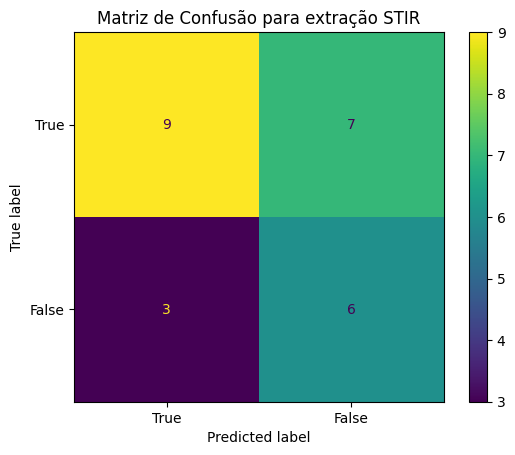

In [28]:
# Calculate and plot the overall confusion matrix
overall_cm = confusion_matrix(y_list, binary_list)
ConfusionMatrixDisplay(overall_cm, display_labels=['True', "False"]).plot()
plt.title('Matriz de Confusão para extração STIR')

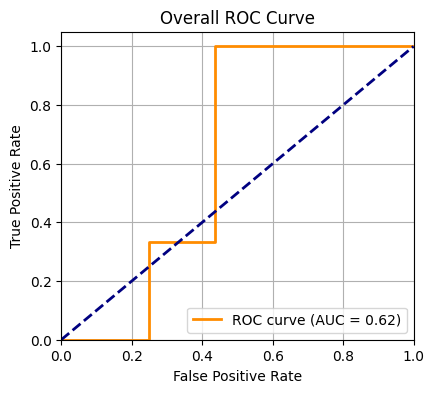

In [29]:
# Calculate and plot the overall ROC curve and AUC
fpr, tpr, _ = roc_curve(y_list, probs_list)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Overall ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)


# -------------------------------------------- Draft ------------------------------------------------------ #

## Test: CV-KFold (futuro)

In [ ]:
# Define the number of epochs
N_EPOCHS=100
RANDOM_SEED=759
N_SAMPLES=10 # number of rowKFolds in each validation fold

# Initialize lists to store predicted probabilities and binary predictions
probs_preds_list = []
binary_preds_list = []

# Initialize lists to store training history metrics for plotting
loss_list = []
accuracy_list = []
precision_list = []
recall_list = []
y_list = []

# Define the feature and label datasets
X = X_scaled
y = y

# Perform LOOCV
# loo = LeaveOneOut()

# Calculate the number of splits based on the number of rows
N_SPLITS = len(X) // N_SAMPLES

# Create the KFold cross-validator
kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_SEED)


In [ ]:
for train_index, test_index in kf.split(X): # loo.split(X)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Instantiate the model
    model = mlp_model()
    
    # Fit the model on the training data
    history = model.fit(X_train, y_train, epochs=N_EPOCHS, callbacks=[early_stopping], verbose=1)
    # usar validation_data aqui no fit msm ????
    
    # Evaluate the model on the test data and store predictions
    y_probs = model.predict(X_test)
    y_pred_binary = (y_probs > 0.5).astype(int)
    
    y_list.append(y_test.values[0][0])

    # Store predicted probabilities and binary predictions for this fold
    probs_preds_list.append(y_probs)
    binary_preds_list.append(y_pred_binary)

    # Store the training history metrics for this fold
    loss_list.append(history.history['loss'])
    accuracy_list.append(history.history['accuracy'])
    recall_list.append(history.history['recall'])
    precision_list.append(history.history['precision'])
    
   # 'val_accuracy', 'val_loss' 


In [ ]:
# ta errado, só faz sentido calcular a média da amostra de validação

# Convert the lists to NumPy arrays
probs_array = np.concatenate(probs_list)
binary_preds_array = np.concatenate(binary_preds_list)
loss_array = np.concatenate(loss_list)
accuracy_array = np.concatenate(accuracy_list)
precision_array = np.concatenate(precision_list)
recall_array = np.concatenate(recall_list)
f1_array = np.concatenate(f1_list)

# Calculate and print the overall metrics after LOOCV
overall_accuracy = accuracy_score(y, binary_preds_array)
overall_precision = precision_score(y, binary_preds_array)
overall_recall = recall_score(y, binary_preds_array)
overall_f1 = f1_score(y, binary_preds_array)

print(f'Overall Accuracy: {overall_accuracy:.2f}')
print(f'Overall Precision: {overall_precision:.2f}')
print(f'Overall Recall: {overall_recall:.2f}')
print(f'Overall F1 Score: {overall_f1:.2f}')



In [ ]:
# Calculate and plot the overall confusion matrix
overall_cm = confusion_matrix(y, binary_preds_array)
ConfusionMatrixDisplay(overall_cm, display_labels=['Class 0', 'Class 1']).plot()
plt.title('Overall Confusion Matrix')

In [ ]:
# Calculate and plot the overall ROC curve and AUC
fpr, tpr, _ = roc_curve(y, probs_array)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Overall ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)


In [ ]:
# Plot the training history for all folds in the same plot
# plt.subplot(1, 2, 2)

rcParams['figure.figsize'] = (15, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

for i, loss in enumerate(loss_list):
    plt.plot(loss, label=f'Fold {i + 1} Loss', linestyle='--')
    plt.plot(accuracy_list[i], label=f'Fold {i + 1} Accuracy', linestyle='-')
    plt.plot(precision_list[i], label=f'Fold {i + 1} Precision', linestyle='-.')
    plt.plot(recall_list[i], label=f'Fold {i + 1} Recall', linestyle=':')


plt.title('Training Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
# plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --------------------------------------------- Draft ------------------------------------------------- #